# Link al repositorio 
https://github.com/angelcast2002/Lab01-IA

# Task 01

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y
w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación
del coeficiente 3w₂ en el contexto del modelo?

Representa el coeficiente de regresión sin estandarizar, el cual se calcula siguiendo el método de los mínimos cuadrados ordinarios y hay uno de dichos coeficientes para cada variable independiente.
Es el cambio estimado en unidades de "y" que se deriva del incremento de X₂ (variable independiente) cuando X₁ se mantiene constante.

https://physiostats.com/regresion-lineal-interpretacion-coeficientes/

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la
multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La multicolinealidad en la regresión lineal ocurre cuando las variables que se usan para predecir están muy conectadas. Esto causa resultados extraños en las interpretaciones y reduce la precisión de los coeficientes. También dificulta la identificación de variables importantes y puede conducir a problemas numéricos. (Sevilla, A. 2019)

https://economipedia.com/definiciones/multicolinealidad.html

# Task 02

## Regresión Logística - Sin librerías

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Cargar el conjunto de datos desde el archivo CSV
file_path = 'dataset_phishing.csv'
df = pd.read_csv(file_path)

X = df[['length_url', 'nb_extCSS']] 
y = df.iloc[:, -1]

print(X.head())
print(y.head())

   length_url  nb_extCSS
0          37          0
1          77          0
2         126          0
3          18          0
4          55          0
0    legitimate
1      phishing
2      phishing
3    legitimate
4    legitimate
Name: status, dtype: object


In [13]:
# Codificar la variable de salida
dummies = pd.get_dummies(y)
concatenado = pd.concat([y, dummies], axis=1)
concatenado = concatenado.drop(['status', "legitimate"], axis=1)
y = concatenado

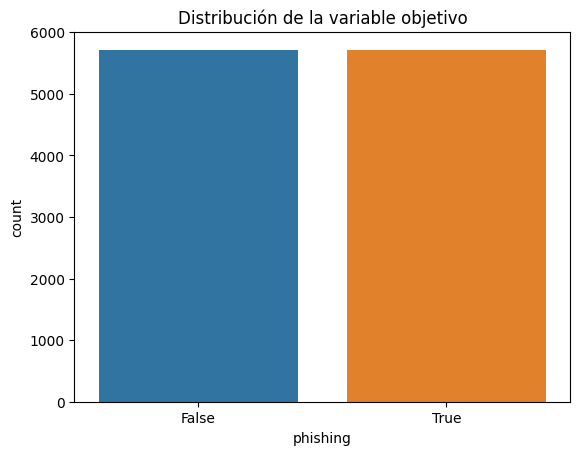

(11430, 2)
(11430, 1)


In [14]:
# Revisar si el dataset está balanceado
sns.countplot(x='phishing', data=y)
plt.title('Distribución de la variable objetivo')
plt.show()

print(X.shape)
print(y.shape)

In [15]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
y
y = y[:, -1]
y

array([False,  True,  True, ..., False, False,  True])

In [7]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1) # cambiamos a distribución 80/20
#X_entreno, X_temp, y_entreno, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [8]:
gradiente = pd.DataFrame()
# 'length_url', 'nb_dots', 'nb_at', 'domain_age'
gradiente["datosX1"] = pd.DataFrame(X_entreno[:, 0])
gradiente["datosX2"] = pd.DataFrame(X_entreno[:, 1])
gradiente["datosY"] = pd.DataFrame(y_entreno.astype(int))
gradiente["sigmoide"] = 0
gradiente["error"] = 0 
print(gradiente)

      datosX1  datosX2  datosY  sigmoide  error
0         127        0       1         0      0
1          51        0       1         0      0
2         122        0       0         0      0
3          32        0       0         0      0
4          30        1       1         0      0
...       ...      ...     ...       ...    ...
9139       41        3       0         0      0
9140       17        2       0         0      0
9141       40        1       1         0      0
9142       43        0       0         0      0
9143       60        1       0         0      0

[9144 rows x 5 columns]


In [9]:
def gradiente_w(w, b):
    gradiente["sigmoide"] = 1/(1+np.exp(-(gradiente["datosX1"]*w+gradiente["datosX2"]*w+b)))
    gradiente["error1"] = (gradiente["sigmoide"]-gradiente["datosY"])*gradiente["datosX1"]
    gradiente["error2"] = (gradiente["sigmoide"]-gradiente["datosY"])*gradiente["datosX2"]
    # obtener la media entre los dos errores. 
    derivative = (gradiente["error1"].mean()+gradiente["error2"].mean())/2
    return(derivative) 

def gradiente_b(w, b):
    gradiente["sigmoide"] = 1/(1+np.exp(-(gradiente["datosX1"]*w+gradiente["datosX2"]*w+b)))
    gradiente["error"] = (gradiente["sigmoide"]-gradiente["datosY"])
    derivative = gradiente["error"].mean()
    return(derivative) 

In [16]:
pasos_w = 0.01
pasos_b = 0.01
w = 0
b = 0

for i in range(1000):
    w = w - pasos_w*gradiente_w(w, b)
    b = b - pasos_b*gradiente_b(w, b)

print(w)
print(b)

0.025387857772645406
-0.9440969636140015


### Gráfica del modelo

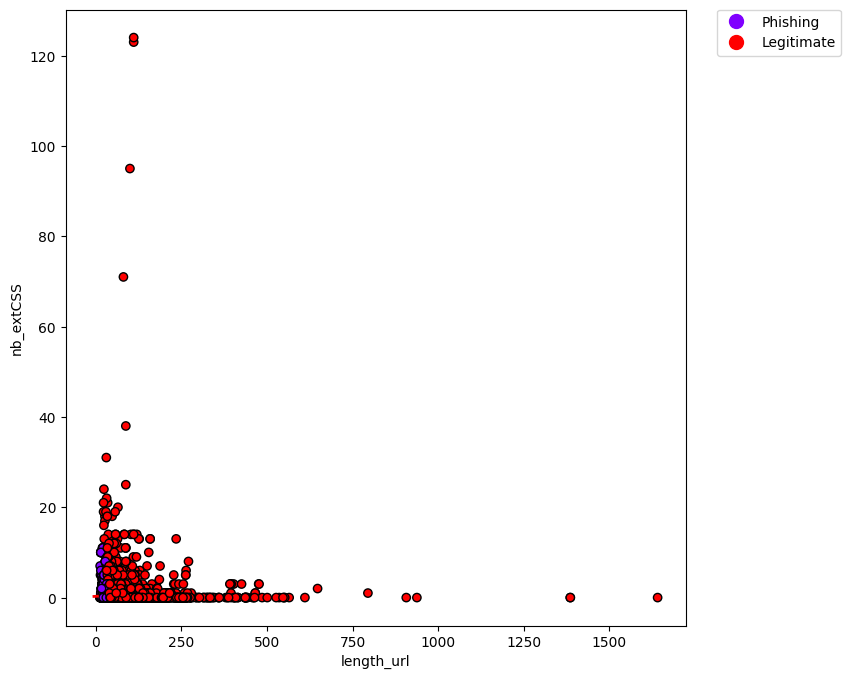

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Graficar la función sigmoide
x = np.linspace(-5, 5, 1000)

# funcion sigmoide
sig = 1 / (1 + np.exp(-(x*w+b)))

# configurar el tamaño de la figura
plt.figure(figsize = (8, 8))

# trazar la función sigmoide
plt.plot(x, sig, 'r', linewidth = 2, label='sigmoide')

# agregamos los puntos. 
scatter = plt.scatter(gradiente["datosX1"], gradiente["datosX2"], c=gradiente['sigmoide'].round(), cmap='rainbow', edgecolors='black')

labels = ["Phishing", "Legitimate"]
colors = [scatter.cmap(scatter.norm(0)), scatter.cmap(scatter.norm(1))]
patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(labels[i]) )[0]  for i in range(len(labels))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

# configuraciones extra:
plt.xlabel('length_url')
plt.ylabel('nb_extCSS')
plt.show()

### Métrica de desempeño

[[1881 2687]
 [1046 3530]]


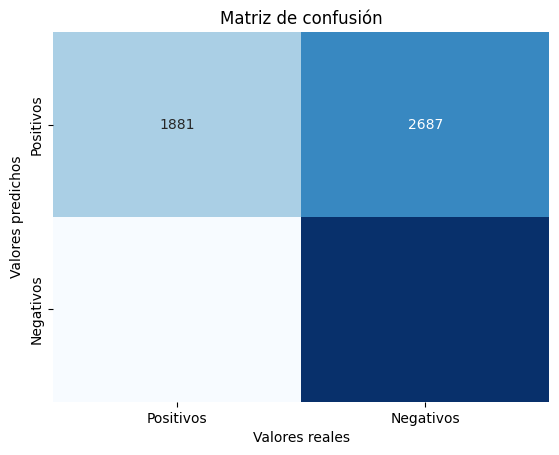

In [19]:
# Calcular las matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_entreno, gradiente["sigmoide"].round())
print(cm)

# graficar la matriz de confusión
sns.heatmap(cm, annot=cm, fmt='d',cmap="Blues", cbar=False, xticklabels=['Positivos', 'Negativos'], yticklabels=['Positivos', "Negativos"])
plt.title('Matriz de confusión')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')

plt.show()

### Accuracy
- Se utilizo accurracy debido a que nos proporciona un porcentaje sobre que tan acertado es nuestro modelo para generar predicciones utilizando todos los datos de la matriz de confusión, además se propuso dicha métrica sobre otras, como F1 Score, a pesar de que nuestra data posee valores atípicos (como se puede observar en la gráfica del modelo), un punto que maneja bien F1, la data posee muchas observaciones con valores pequeños, lo cual penalizaría mucho más el score que lo ganado por manejar los puntos atípicos.

In [21]:
acurracy = (cm[0,0]+cm[1,1])/cm.sum()
print((acurracy * 100).round(2), "%")

59.18 %


### Observaciones extras

Para una mayor facilidad y entramiento del modelo, se seleccionaron manualmente las variable a utilizar en el modelo. Así mismo los datos fueron manipulados para la transformación de estos a dataframes o para cambiar su representación en código, todo esto sin afectar la estructura de los datos. Tambien se tuvo que implementar una función para cada coeficiente (w y b), y plantear una ecuación especial para la cantidad de variables de entrenamiento (2). Por último se ingresaron valores aleatoreos de w y b, y se iteraron las funciones durante mil pasos para conseguir el mejor resultado posible.

## Regresión Logística - Librerias

In [60]:
# Importar Librerías Generales
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
# importamos el dataset
df = pd.read_csv('dataset_phishing.csv')

print(df['status'].head())

# Es conveniente usar encoding para evitar problemas con los caracteres especiales (Legitimate y Phishing)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

# mostramos los primeros 5 registros
print(df['status'].head())


0    legitimate
1      phishing
2      phishing
3    legitimate
4    legitimate
Name: status, dtype: object
0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int32


In [62]:
# Dividimos el dataset en variables dependientes e independientes. 
from sklearn.model_selection import train_test_split
X = df[['length_url', 'nb_extCSS']] # variables independientes
y = df['status'] # variable dependiente

In [63]:
# Dividimos la data en entrenamiento y prueba. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# 80% entrenamiento, 20% prueba

# Entrenamos el modelo. 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0) # logistic regression
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [64]:
# Obtenemos la predicción, la probamos con la test_data.
prediction = model.predict(X_test)
ans = model.score(X_test, y_test)
print("prediction score: %.3f" % ans, "\n")

temptable = pd.DataFrame({'Real':y_test, 'Predicción':prediction})
if len(temptable) > 10:
    print(temptable.head(10))

prediction score: 0.589 

      Real  Predicción
6406     0           0
4266     1           0
1238     1           0
2646     1           0
2217     0           1
2158     1           0
9823     0           1
4401     1           0
9349     0           1
1399     0           1


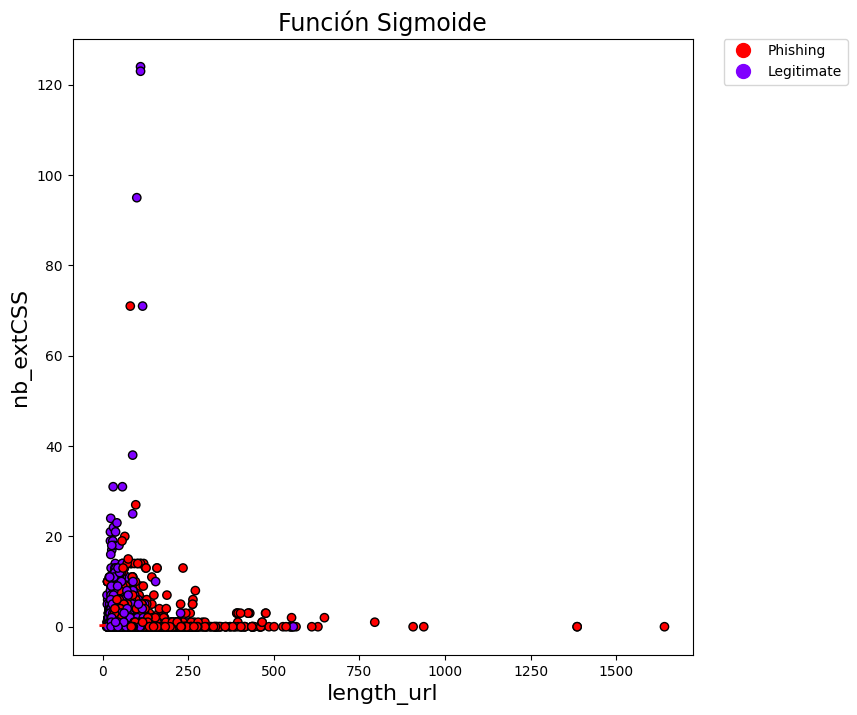

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Graficamos los resultados. 
x = np.linspace(-5, 5, 100)

# funcion sigmoide
sig = 1 / (1+np.exp(-(model.coef_[0][0]*x + model.intercept_[0])))

# crear la gráfica
plt.figure(figsize=(8,8))
plt.plot(x, sig, 'r', linewidth=2, label="sigmoide")

# agregar los puntos a la gráfica.
scatter = plt.scatter(df['length_url'], df['nb_extCSS'], c=df['status'], cmap='rainbow', edgecolors='k')

labels = ["Phishing", "Legitimate"]
colors = [scatter.cmap(scatter.norm(1)), scatter.cmap(scatter.norm(0))]
patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(labels[i]) )[0]  for i in range(len(labels))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.title('Función Sigmoide', fontsize=17)
plt.xlabel('length_url', fontsize=16)
plt.ylabel('nb_extCSS', fontsize=16)
plt.show()

### Métrica de desempeño

[[789 366]
 [574 557]]


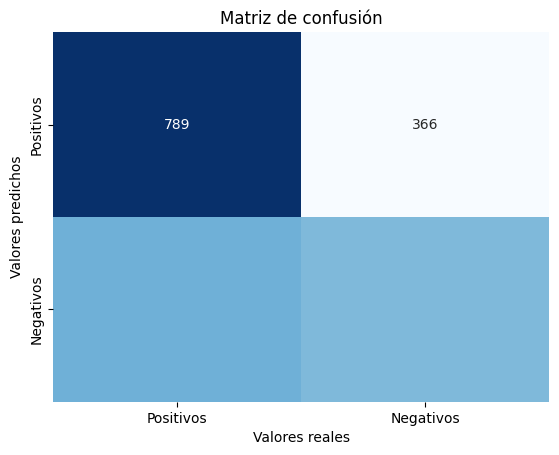

In [ ]:
cm = confusion_matrix(y_test, prediction)
print(cm)

# graficar la matriz de confusión
sns.heatmap(cm, annot=cm, fmt='d',cmap="Blues", cbar=False, xticklabels=['Positivos', 'Negativos'], yticklabels=['Positivos', "Negativos"])
plt.title('Matriz de confusión')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')

plt.show()


### Accuracy
- Se utlizó la misma técnica que en la implementación sin libreías para tener un mejor control de los resultados

In [ ]:
acurracy = (cm[0,0]+cm[1,1])/cm.sum()
print((acurracy * 100).round(2), "%")

58.88 %


### ¿Cuál implementación es mejor? ¿Por qué?
Como podemos observar ambas implementaciones poseen un accuracy muy similar, siendo la diferencia entre estos tan solo del 0.3%, realmente es un valor insignificante, sin embargo podemos decir que el modelo implementado por medio de las librerías es mucho mejor para trabajar, ya que nos ofrece la facilidad de manejar dicho modelo, reduciendo la complejidad de la implementación, así como su validación y entrenamiento. Aunque no es el objetivo del curso, cabe destacar que con tan solo leer la documentación de las librerías es factible implementar el modelo, lo que hace que se accesible para las personas sin que estas tengan que conocer la teoría detrás del mismo.

# K-nearest algorithm

## KNN - Sin librerias

In [22]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [23]:
data = pd.read_csv('dataset_phishing.csv')
data.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['status'] = le.fit_transform(data['status'])
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [24]:
# Asignamos X y y. 
X = data[['length_url', 'nb_extCSS', 'nb_at', 'domain_age']]
y = data['status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print()

In [25]:
def distancia_euclidiana(valor1, valor2):
    return np.sqrt(np.sum((valor1 - valor2)**2))

class algoritmo_KNN:
    def __init__(self, grupos=3):
        self.k = grupos

    def ajuste(self, X_data_train, y_data_train):
        self.X_train = X_data_train
        self.y_train = y_data_train

    def predecir(self, X_data_test):
        predicciones = [self._predecir(x) for x in X_data_test]
        return predicciones

    def _predecir(self, x):
        distancias = [distancia_euclidiana(x, x_train) for x_train in self.X_train]
        K_indices = np.argsort(distancias)[:self.k]
        K_vecinos = [self.y_train[i] for i in K_indices]
        mas_comun = Counter(K_vecinos).most_common()
        return mas_comun[0][0]

In [26]:
# Crear una instancia del modelo KNN con k=2
knn_model = algoritmo_KNN(grupos=2)

# Entrenar el modelo con los datos de entrenamiento
knn_model.ajuste(X_train.values, y_train.values)

# Realizar predicciones sobre los datos de prueba
predicciones = knn_model.predecir(X_test.values)

# Imprimir las predicciones
print(predicciones)

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 

In [27]:
print(len(y_test))
print(len(predicciones))

2286
2286


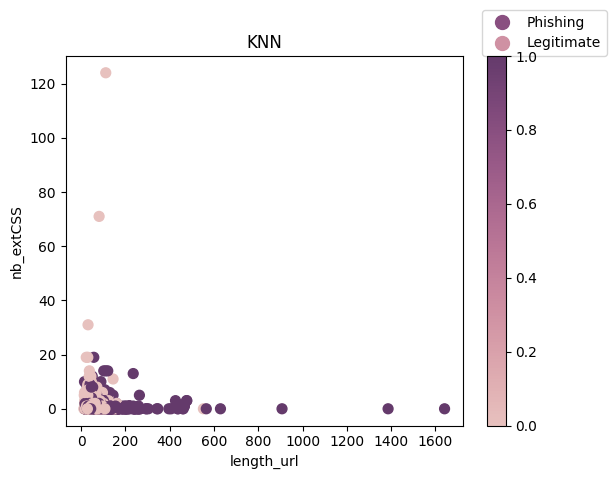

In [37]:
import seaborn as sns
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test['length_url'], X_test['nb_extCSS'], c=predicciones, s=50, cmap=cmap)
f.colorbar(points)

labels = ['Phishing', 'Legitimate']
colors = [cmap(0.8), cmap(0.3)]
patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(labels[i]) )[0]  for i in range(len(labels))]
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0. )


plt.xlabel('length_url')
plt.ylabel('nb_extCSS')
plt.title('KNN')

plt.show()


### Métricas de desempeño 

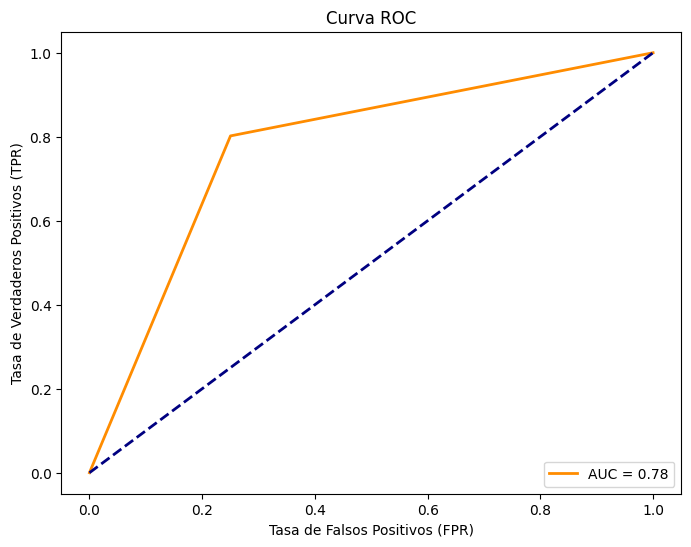

In [31]:
from sklearn.metrics import roc_curve, auc


# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predicciones)

# Calcular el área bajo la Curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.show()

### Curva ROC
Se decidió utilizar la curba ROC para poder médir la eficacia del modelo debido a que resume de una forma clara y gráfica el rendimiento del modelo, en dodne sed puede visualizar la tasa de verdaderos positivos contra la tasa de falsos positivos. 

### Observaciones extra

Se utilizaron clases para crear el proceso de procesamiento de datos con los que se ajustaría el modelo debido a que se consideó que era la mejor forma de implementar los distintos métodos que requería la implementación del modelo. 

## KNN - Usando Librerías

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
# importamos el dataset
df = pd.read_csv('dataset_phishing.csv')

# Es conveniente usar encoding para evitar problemas con los caracteres especiales (Legitimate y Phishing)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

# mostramos los primeros 5 registros
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [51]:
# Dividimos el dataset en variables dependientes e independientes. 
from sklearn.model_selection import train_test_split
X = df[['length_url', 'nb_extCSS','nb_at', 'domain_age']] # variables independientes
y = df['status'] # variable dependiente

In [52]:
# Dividimos la data en entrenamiento y prueba. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# 80% entrenamiento, 20% prueba

In [53]:
# Entrene el modelo con el algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [54]:
# Obtenemos el objeto de predicción, entrenado con X_test
y_pred = classifier.predict(X_test)

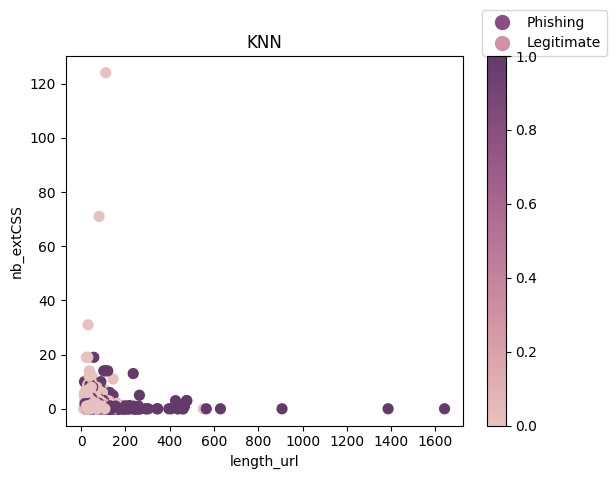

In [56]:
import seaborn as sns
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test['length_url'], X_test['nb_extCSS'], c=y_pred, s=50, cmap=cmap
)
f.colorbar(points)

labels = ['Phishing', 'Legitimate']
colors = [cmap(0.8), cmap(0.3)]
patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(labels[i]) )[0]  for i in range(len(labels))]
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0. )

plt.xlabel('length_url')
plt.ylabel('nb_extCSS')
plt.title('KNN')

plt.show()

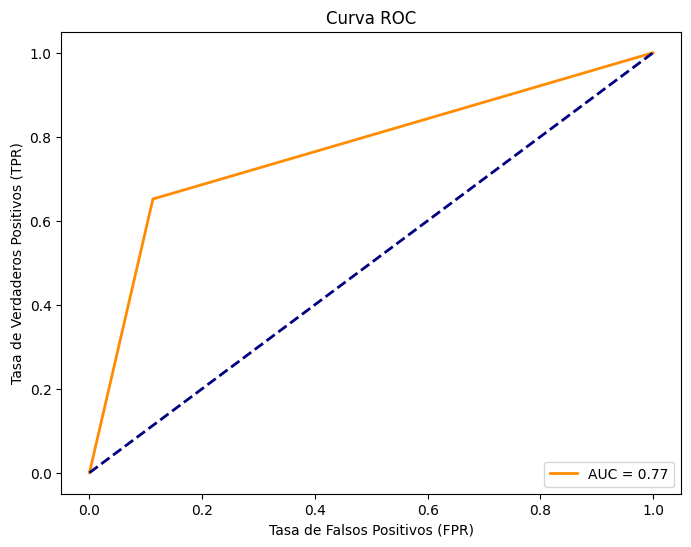

In [58]:
# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcular el área bajo la Curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

### Curva ROC

Se utilizó la misma métrica que la implementación sin librerías para tener un mejor control de resultados. 

### ¿Cuál implementación es mejor? ¿Por qué?
Ambas implemnentaciones obtuvieron exactamente el mismo resultado al calcular el área bajo la curva, por lo que podemos concluir que no existe una mejor implementación que otra, pero se recomienda el uso de la implementación con librerías debido a las funcionalidades extra que ofrece la libreía sklearn y la facilidad de uso de las mismas. 